In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

from sklearn.cluster import KMeans
import numpy as np
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
steps = pd.read_csv('steps.csv',sep=";")
steps.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
survey = pd.read_csv('survey.csv')
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
df = pd.merge(steps,survey, on = 'id') #'id' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to weight
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


In [6]:
def clean_weight(x):
    if x > 200.0 or x < 50.0: 
        return float('NaN')
    else: 
        return x
df['height'] = df['height'].apply(clean_weight)

df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [7]:
def clean_height(x):
    if x > 200.0 or x < 40.0: 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(clean_weight)

df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [8]:
df['avrage_of_steps'] = df.iloc[:328].mean(axis=1)
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_8468\138635626.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['avrage_of_steps'] = df.iloc[:328].mean(axis=1)


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,avrage_of_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9907.035294
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5519.720238
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8032.196078
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,2917.120000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4866.016949


In [9]:
df.describe()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,hh_size,education,height,weight,avrage_of_steps
count,929.000000,24.000000,243.000000,278.000000,296.000000,354.000000,353.000000,328.000000,380.000000,419.000000,...,71.000000,86.000000,81.000000,66.000000,0.0,929.000000,929.000000,928.000000,897.00000,328.000000
mean,465.000000,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,8690.810198,8362.570122,8261.913158,9231.391408,...,9570.690141,7614.848837,6805.925926,7505.530303,NaN,2.342304,2.530678,171.668103,73.06466,6246.980513
std,268.323499,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,4843.885824,5762.374515,4325.239676,5282.031304,...,7264.297875,5521.711875,8458.979146,4706.609481,NaN,1.226129,1.274491,9.080235,14.99986,4338.212456
min,1.000000,164.000000,67.000000,25.000000,43.000000,11.000000,154.000000,7.000000,4.000000,9.000000,...,664.000000,103.000000,12.000000,388.000000,NaN,1.000000,1.000000,145.000000,50.00000,55.800000
25%,233.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,5212.000000,4496.000000,5261.250000,5679.000000,...,5149.000000,3950.000000,2510.000000,4932.000000,NaN,1.000000,1.000000,165.000000,62.00000,3764.032680
50%,465.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,8299.000000,7638.000000,8147.000000,8844.000000,...,7235.000000,6627.000000,3120.000000,6568.500000,NaN,2.000000,2.000000,172.000000,72.00000,5665.512577
75%,697.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,11386.000000,11910.000000,11000.000000,12140.500000,...,12062.500000,10031.500000,6544.000000,9549.000000,NaN,3.000000,4.000000,179.000000,82.00000,8038.335465
max,929.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,23902.000000,31254.000000,23836.000000,43238.000000,...,33379.000000,27605.000000,36031.000000,33660.000000,NaN,11.000000,5.000000,195.000000,155.00000,54793.113924


C:\Users\Asus\AppData\Local\Temp\ipykernel_8468\1299226577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avrage_of_steps'], rug=True)


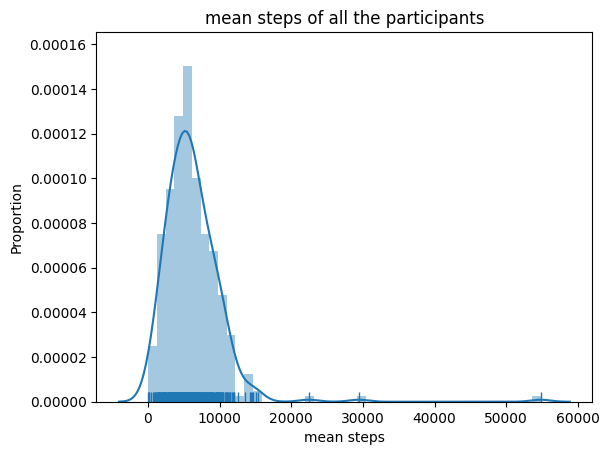

In [10]:
sns.distplot(df['avrage_of_steps'], rug=True)
plt.title('mean steps of all the participants')
plt.xlabel('mean steps')
plt.ylabel('Proportion')
plt.show()

There seem to be some outliers for average of steps so let's do some cleanings

C:\Users\Asus\AppData\Local\Temp\ipykernel_8468\2336845085.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(averagesteps, kde=False)


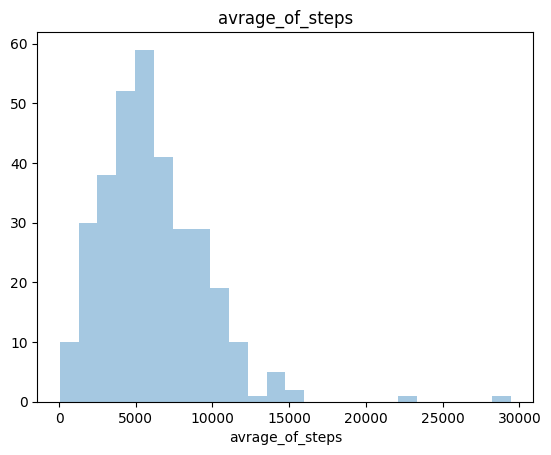

In [11]:
def clean_steps(x):
    if x > 30000.0 or x < 0: 
        return float('NaN')
    else: 
        return x
df['avrage_of_steps'] = df['avrage_of_steps'].apply(clean_steps)
df['avrage_of_steps'].name = 'avrage_of_steps' #Labeling the variable for plotting
averagesteps = df['avrage_of_steps'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(averagesteps, kde=False) 
plt.title('avrage_of_steps')
plt.show()

In [12]:
print("Mean of the mean steps inside the dataframe = ",df['avrage_of_steps'].mean())
print("Median of the mean steps inside the dataframe = ",df['avrage_of_steps'].median())
print("Standard deviation of the mean steps inside the dataframe = ",df['avrage_of_steps'].std())

Mean of the mean steps inside the dataframe =  6098.521389859757
Median of the mean steps inside the dataframe =  5659.503030303031
Standard deviation of the mean steps inside the dataframe =  3409.763303626438


## Interpretation

Normality: the distribution seems almost normal and most people seem to have around the 6.000 steps.

Variation: there is little variation, most people are between 2.000 and 10.000 steps.

Modality: there is one peak at 6.000

Skewness: the distribution is skewed to the right.

Outliers: there are a some outliers(more than 30.000 steps that were cleaned!)

In [13]:
df['avrage_of_steps'].name = 'avrage_of_steps' #Labeling the variable for plotting
avr_of_steps = df['avrage_of_steps'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot


C:\Users\Asus\AppData\Local\Temp\ipykernel_8468\3787373765.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(averagesteps)


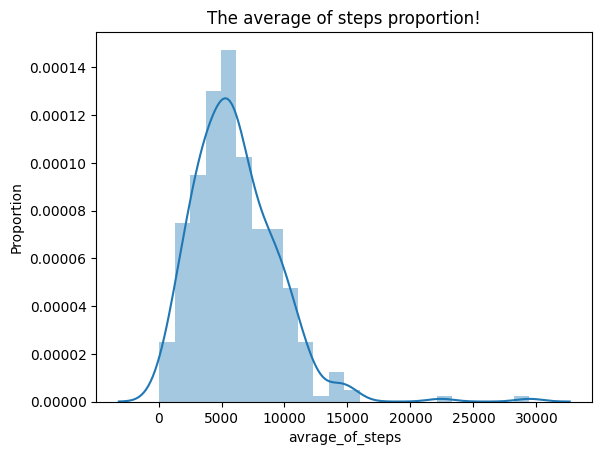

In [14]:
sns.distplot(averagesteps)
plt.title('The average of steps proportion!')
plt.ylabel('Proportion')
plt.show() 

C:\Users\Asus\AppData\Local\Temp\ipykernel_8468\3835523990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(averagesteps, rug=True)


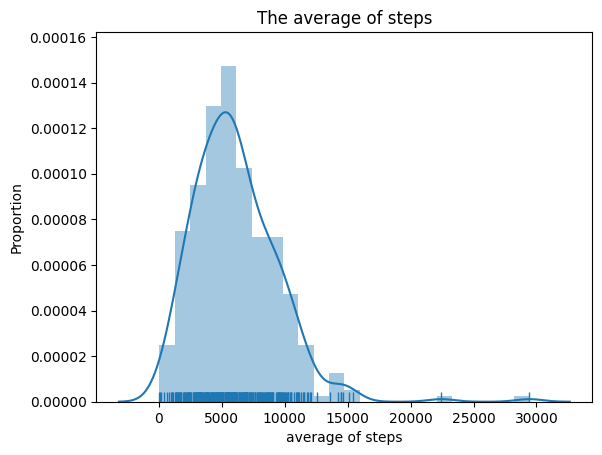

In [15]:
sns.distplot(averagesteps, rug=True)
plt.title('The average of steps')
plt.xlabel('average of steps')
plt.ylabel('Proportion')
plt.show()

<AxesSubplot: xlabel='avrage_of_steps', ylabel='age'>

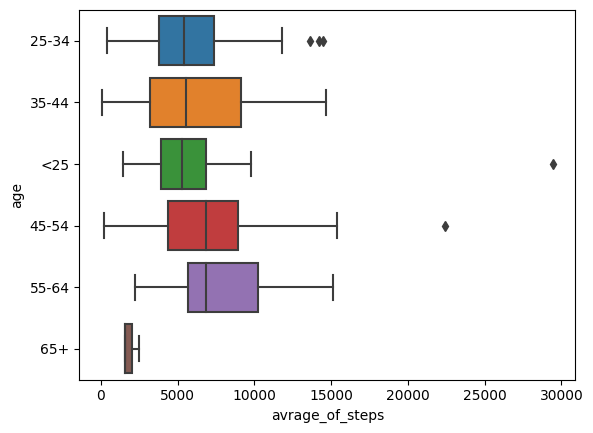

In [16]:
sns.boxplot(data=df, x="avrage_of_steps", y="age")

## Interpretation

Normality: The age group of 55-64 has the higgest average steps per day in comparison to people older than 65 which .

Variation: There is quite a big variation between the older and younger age groups. The middle age group of 35-44 has a high average of daily steps compared to the age group above (45-54).

Skewness:A right-skewed (positive) distribution may be seen for the age ranges of 35 to 44 and 55 to 64. The distribution for the 45–54 age range is negative (left). The distribution of the remaining age groups is normal.

Outliers: This graph contains a few outliers. The point at roughly 57.500 steps in the 25- to 34-year-old age group is the one that is the most significant. Additionally, the below25 age group has a significant outlier with more than 30.000 steps per day.

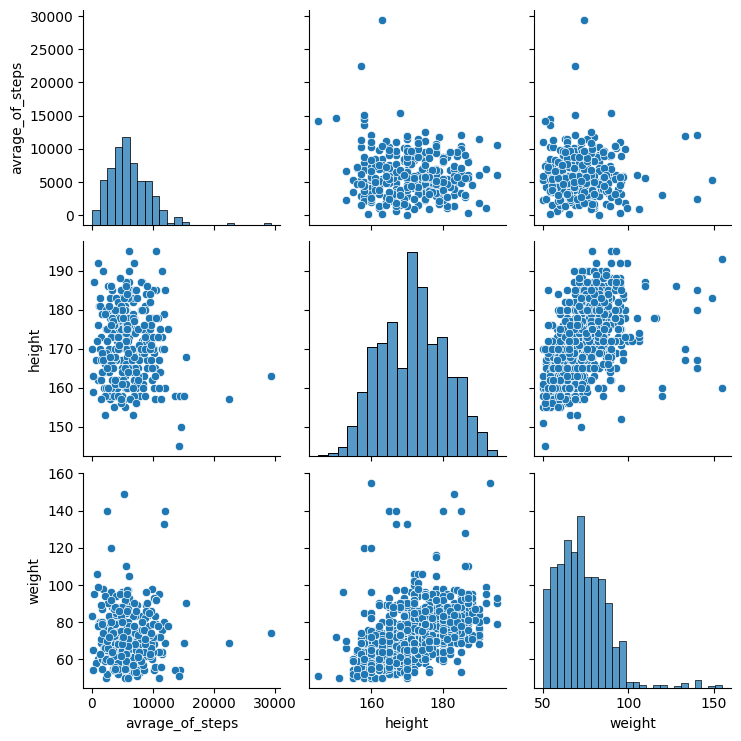

In [17]:
df_sel = df[['avrage_of_steps', 'height', 'weight']]

sns.pairplot(df_sel)
plt.show()

## Interpretation

There seems to be a nice linear regression between average of steps and height and also between weight and average of steps
We'll look at the row for price in both tables and check:



## Correlation Matrix

In [18]:
corr = df[['avrage_of_steps', 'height', 'weight']].corr()
corr

,avrage_of_steps,height,weight
avrage_of_steps,1.000000,-0.087674,-0.031641
height,-0.087674,1.000000,0.476915
weight,-0.031641,0.476915,1.000000


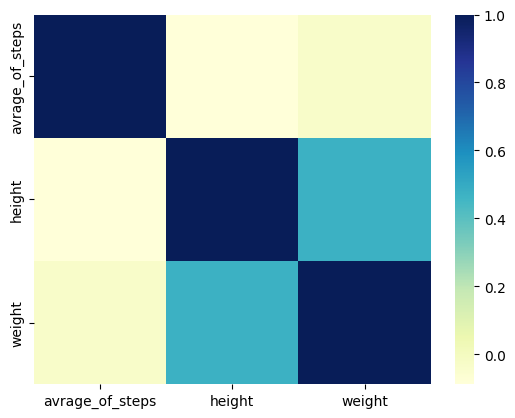

In [19]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

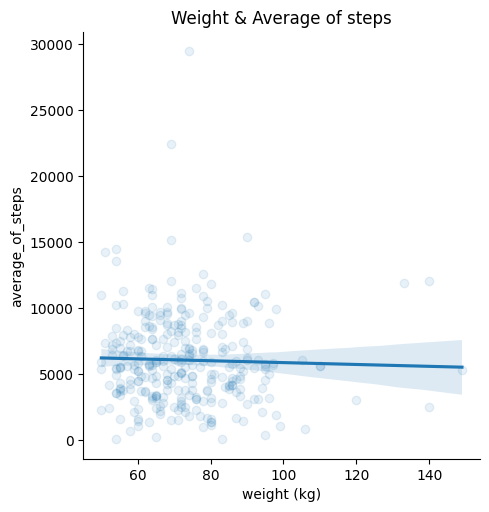

In [20]:
sns.lmplot(x='weight', y='avrage_of_steps', fit_reg=True, data=df, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('weight (kg)') #use matplotlib to refine Seaborn plot
plt.ylabel('average_of_steps')
plt.title('Weight & Average of steps')
plt.show()

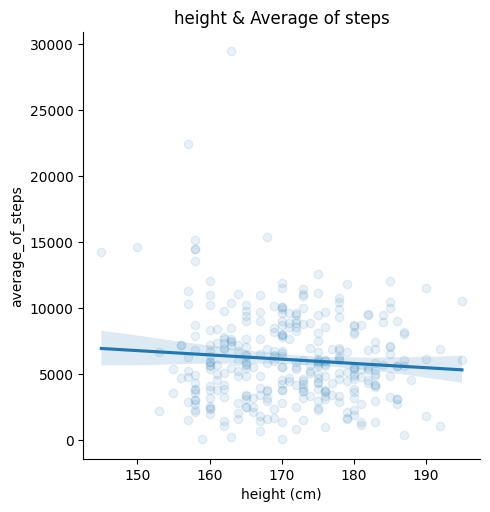

In [21]:
sns.lmplot(x='height', y='avrage_of_steps', fit_reg=True, data=df, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('height (cm)') #use matplotlib to refine Seaborn plot
plt.ylabel('average_of_steps')
plt.title('height & Average of steps')
plt.show()

## Interpretation

It is obvious that there are some correlations between height and average of steps and also weight and average of steps

In [22]:
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,avrage_of_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9907.035294
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5519.720238
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8032.196078
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,2917.120000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4866.016949


We'll look at the row for *average of steps* in the table:
1. If the relationship is linear
2. If there is correlation (either positive or negative)



We will take the variables *height*, *weight* 

There seems to be a negative relationship between average of steps and height also There seems to be a negative relationship between average of steps and weight

Making comparison between weight and height seems meaningless



In [23]:
df=df[df['weight'].notna()]

In [24]:
df=df[df['avrage_of_steps'].notna()]

In [25]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

x = df[['weight']] #to use sk-learn, we need to create lists of the two variables
y = df['avrage_of_steps']

lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 6573.14 + -7.06X


Or, in a pretty Markdown formula (using $ to begin and end a formula):

y = 6573.14 + -7.06X
Where y is average of steps  and x is wight .

Now, let's use our model to predict the values  in our dataset:

In [26]:
df['avrage_of_steps_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(50)


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,avrage_of_steps,avrage_of_steps_p
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9907.035294,5881.203058
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5519.720238,6029.474337
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8032.196078,5987.111114
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,2917.120000,6008.292726
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4866.016949,6142.442931
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,Lille,Male,35-44,1,1,Vocational,170.0,63.0,11533.183544,6128.321856
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0,4326.800000,6043.595411
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,3313.063492,5951.808429
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lille,Female,35-44,4,4,Vocational,172.0,69.0,8263.355932,6085.958634
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0,3120.500000,5916.505743


In [27]:
df["resid"] = df["avrage_of_steps"] - df['avrage_of_steps_p']
df.head(20)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,gender,age,hh_size,education,education_1,height,weight,avrage_of_steps,avrage_of_steps_p,resid
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Male,25-34,4,4,Master or doctorate,178.0,98.0,9907.035294,5881.203058,4025.832237
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Male,35-44,1,3,Bachelor,180.0,77.0,5519.720238,6029.474337,-509.754099
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Male,25-34,2,2,Master or doctorate,180.0,83.0,8032.196078,5987.111114,2045.084964
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,<25,1,1,Bachelor,178.0,80.0,2917.120000,6008.292726,-3091.172726
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,25-34,3,4,Bachelor,167.0,61.0,4866.016949,6142.442931,-1276.425982
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,Male,35-44,1,1,Vocational,170.0,63.0,11533.183544,6128.321856,5404.861688
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,25-34,2,2,Master or doctorate,175.0,75.0,4326.800000,6043.595411,-1716.795411
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,25-34,3,4,Master or doctorate,165.0,88.0,3313.063492,5951.808429,-2638.744937
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,35-44,4,4,Vocational,172.0,69.0,8263.355932,6085.958634,2177.397298
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,Female,25-34,2,2,Master or doctorate,165.0,93.0,3120.500000,5916.505743,-2796.005743


In [28]:
df=df[df['gender'].notna()]
dummies = pd.get_dummies(df["gender"])
dummies

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
323,1,0
324,1,0
325,0,1
326,0,1


In [29]:
df = pd.concat([df, dummies], axis=1) #add to dataframe
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,hh_size,education,education_1,height,weight,avrage_of_steps,avrage_of_steps_p,resid,Female,Male
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,4,4,Master or doctorate,178.0,98.0,9907.035294,5881.203058,4025.832237,0,1
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,1,3,Bachelor,180.0,77.0,5519.720238,6029.474337,-509.754099,0,1
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,2,2,Master or doctorate,180.0,83.0,8032.196078,5987.111114,2045.084964,0,1
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,Bachelor,178.0,80.0,2917.120000,6008.292726,-3091.172726,0,1
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,4,Bachelor,167.0,61.0,4866.016949,6142.442931,-1276.425982,1,0


## Multiple linear regression

In [30]:
df=df[df['height'].notna()]
df=df[df['weight'].notna()]
df=df[df['Male'].notna()]
df=df[df['Female'].notna()]
X = df[['height', 'weight','Male','Female']] #to use sk-learn, we need to create lists of the two variables
y = df['avrage_of_steps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

lm = LinearRegression() #this creates a new LR model
lm.fit(X_train, y_train) #this "fits" the model on the training data

LinearRegression()

In [31]:
y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions; store in original dataframe

## Evaluating the model

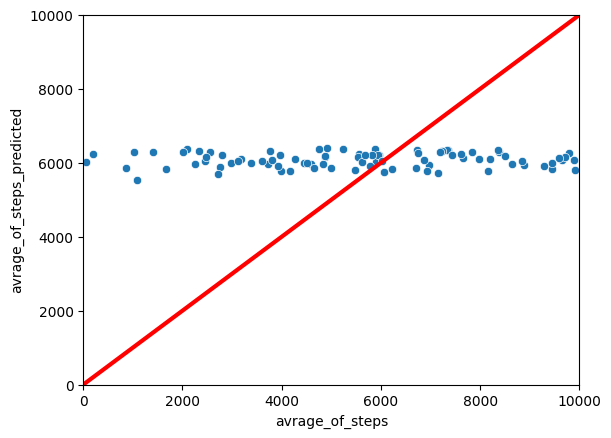

In [32]:
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(0, 10000) #This sets the x-axis limits to (0, 5e10 = 140000000000)
plt.ylim(0, 10000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 10000], [0, 10000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('avrage_of_steps')
plt.ylabel('avrage_of_steps_predicted')
plt.show()

On the x-axis we have the actual average of steps. On the y-axis we have the predicted average for that channel. If the model is perfect, all points should be on the line. Obviously, they are not.

We can conclude that our model predicts too low.

Now to predict the R^2 and RMSE

In [33]:
r2_score(df['avrage_of_steps'], df['avrage_of_steps_p']) #this gives the model fit (R2) for the Y and predicted Y

0.000942544241847032

The R^2 is 0.00094, which means 0.094% of the variation in steps is explained by the model. That's pretty low!

In [34]:
math.sqrt(mean_squared_error(df['avrage_of_steps'], df['avrage_of_steps_p'])) #this gives the model fit (R2) for the Y and predicted Y

3372.432578659501

The RMSE is 3372.4 steps. Which means that we are typically about 3372.4 steps off in our predicted views.